<a href="https://colab.research.google.com/github/DaniilRyb/OIRS/blob/master/LR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛР4 по ОИРС
# Выпонил: Рыбаков Даниил ИУ8-83

База данных оценки автомобилей была получена на основе простой иерархической модели принятия решений, первоначально разработанной для демонстрации DEX, M. Bohanec, V. Rajkovic: Экспертная система для принятия решений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
col_names = ['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety', 'decision']
path = "car_evaluation.csv"

car_data = pd.read_csv(path, header = 0, names = col_names)

print(car_data.shape)
car_data.head()

(1727, 7)


,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Мы видим, что существует 1727 строк и 7 функциональных столбцов.

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**Мы можем проверить частоту меток в категориальных переменных**

In [4]:
for col in col_names:
    print(car_data[col].value_counts()) 

high     432
med      432
low      432
vhigh    431
Name: buyPrice, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maintCost, dtype: int64
3        432
4        432
5more    432
2        431
Name: noDoors, dtype: int64
4       576
more    576
2       575
Name: noPersons, dtype: int64
med      576
big      576
small    575
Name: bootLuggage, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64


Подсчет общего количества для каждого объекта приводит к количеству строк: 1727, поэтому нулевых значений нет. Мы можем еще раз проверить с помощью:

In [5]:
car_data.isnull().sum()

buyPrice       0
maintCost      0
noDoors        0
noPersons      0
bootLuggage    0
safety         0
decision       0
dtype: int64

2: Предварительный анализ данных <br/>
2.1 Кодирование категориальных признаков
Поскольку некоторые из наших функций являются категориальными, мы должны закодировать их в целочисленную форму:

In [6]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.4 MB/s eta 0:00:00


In [7]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety'])

car_data = encoder.fit_transform(car_data)

print(car_data.head())
car_data.head()

   buyPrice  maintCost  noDoors  noPersons  bootLuggage  safety decision
0         1          1        1          1            1       1    unacc
1         1          1        1          1            1       2    unacc
2         1          1        1          1            2       3    unacc
3         1          1        1          1            2       1    unacc
4         1          1        1          1            2       2    unacc


,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,2,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc


In [8]:
car_data.describe().round(2)

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety
count,1727.00,1727.00,1727.00,1727.00,1727.00,1727.00
mean,2.50,2.50,2.50,2.00,2.00,2.00
std,1.12,1.12,1.12,0.82,0.82,0.82
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,1.00,1.00,1.00
50%,3.00,3.00,3.00,2.00,2.00,2.00
75%,3.50,3.50,3.50,3.00,3.00,3.00
max,4.00,4.00,4.00,3.00,3.00,3.00


Одномерные графики гистограмм (распределение данных объектов)

<ipython-input-9-cbc706dcf184>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  car_data.hist(ax = ax)


array([[<Axes: title={'center': 'buyPrice'}>,
        <Axes: title={'center': 'maintCost'}>],
       [<Axes: title={'center': 'noDoors'}>,
        <Axes: title={'center': 'noPersons'}>],
       [<Axes: title={'center': 'bootLuggage'}>,
        <Axes: title={'center': 'safety'}>]], dtype=object)

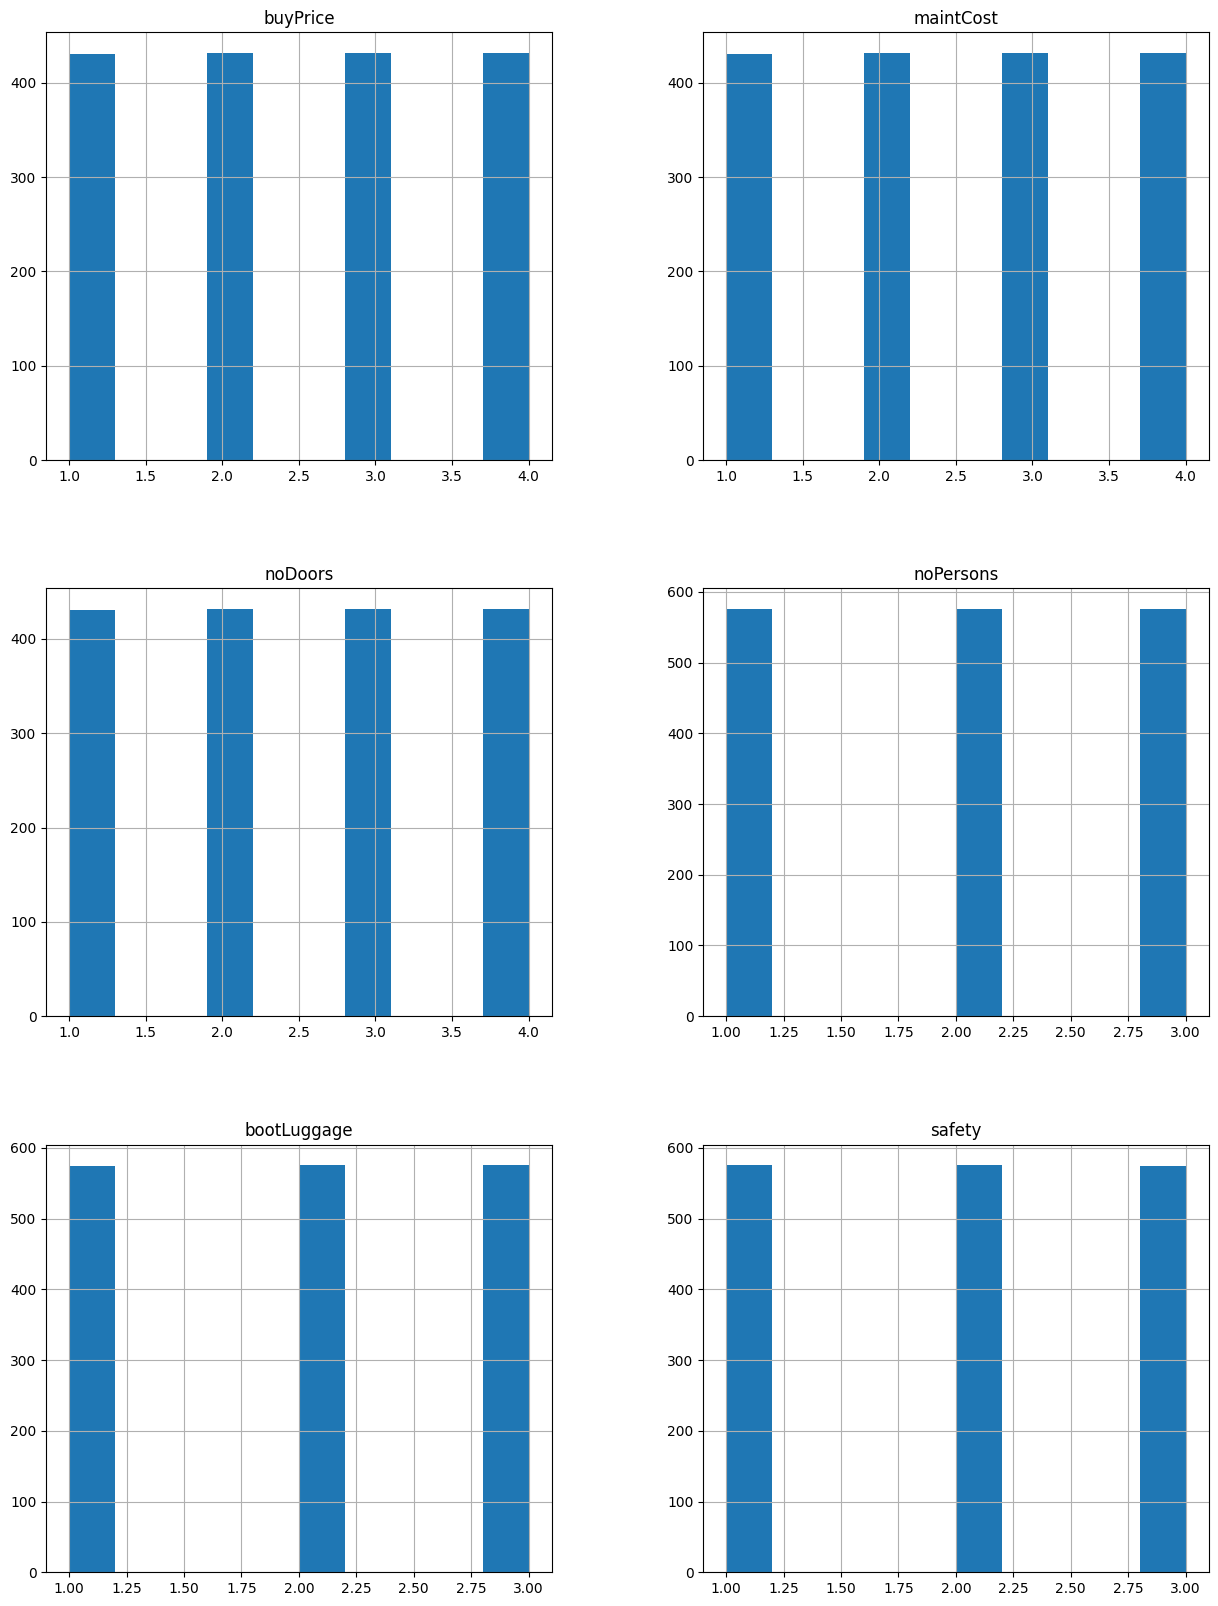

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
car_data.hist(ax = ax)

2.5 Разделение функций обучения и целей
Сначала мы объявляем нашу целевую переменную и наш набор функций:

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(max_iter = 700, random_state = 1)

In [11]:
X = car_data.drop(['decision'], axis=1)
y = car_data['decision']

X.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
              'activation': ['relu','tanh','logistic'],
              'learning_rate': ['constant','adaptive'],
              'solver': ['adam', 'sgd']}

mlp_model = GridSearchCV(
    mlp,
    param_grid,
    cv=5,
    verbose=0,
    n_jobs=-1)

history = mlp_model.fit(X, y)

mlp_model.score(X, y)

mlp_model.best_params_

In [ ]:
mlp_model.best_score_

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
clf1 = MLPClassifier(max_iter=700, hidden_layer_sizes=(50, 100, 50),
                     activation='relu',
                     solver='adam',
                     learning_rate='constant',
                     verbose=True, early_stopping=True, random_state=1)
clf1.fit(X_train, y_train)
clf2 = MLPClassifier(max_iter=100, hidden_layer_sizes=(50, 100, 50),
                     activation='relu',
                     solver='adam',
                     learning_rate='constant',
                     verbose=True, early_stopping=True, random_state=1)
clf2.fit(X_test,y_test)

from sklearn.metrics import classification_report
#Predicting y for X_val
y_pred = clf1.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
print(len(clf1.loss_curve_))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clf1.loss_curve_)
plt.plot(clf2.loss_curve_)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clf1.validation_scores_)
plt.plot(clf2.validation_scores_)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()